# The Spark Foundation Internship - TASK 2
#### Author: Muhammad Hammad Hassan
#### Batch October 2021
Create suitable **clusters** fro the *iris dataset* (present in Scikit learn module).
I'm Using K-Means Clusters algorithm to solve this problem.

In [18]:
#CODE BEGINS

In [13]:
# Importing libraries

import numpy as np #for arrays
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for dataframes
from sklearn import datasets # for iris dataset
from sklearn.cluster import KMeans # for K-means model

In [14]:
# taking Iris dataset from sklearn module
iris = datasets.load_iris()
# creating a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [15]:
# to see what kind of columns are available ion this dataset
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
# displaying the first 3 columns of our dataset
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**COMMENT:** *We only took "features" into our dataset. Other attributes are irrelevant for now.*

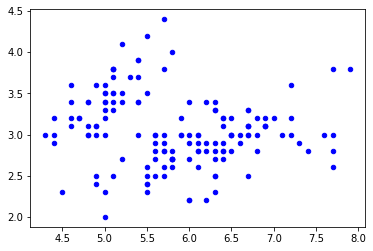

In [28]:
#visualizing the scatter plot for sepal-length and sepal-width.
x = df[['sepal length (cm)']]
y = df[['sepal width (cm)']]
plt.scatter(x, y, s = 20, c = 'blue')

In [17]:
# in this case, we know what types of and how many clusters we are looking for i.e.
count = 1
print("Three types of Irises are present in this dataset:")
for item in iris.target_names:
    print(count, "- ", item)
    count += 1

Three types of Irises are present in this dataset:
1 -  setosa
2 -  versicolor
3 -  virginica


**COMMENT:** *Let's see what the Elbow-algo's recommendations are for the number of clusters.*

In [31]:
# preparing "x" variable which is all 4 paramerters
# i.e. sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
x = df.iloc[:, [0, 1, 2, 3]].values

C:\Users\D4Rk_C4K3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


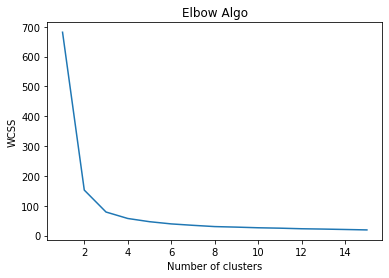

In [32]:
# Creating an Within-Cluster Sum of Squares Array
wcss = []

# Applying the Elbow Method by a for loop.
# This will iterate through various instances of no. of clusters and plot each instance on a graph.
max_limit = 16
def elbow_plot(mx):
    for i in range(1,mx):
        KM = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        KM.fit(x)
        yield KM.inertia_
        
for k in elbow_plot(max_limit):
    wcss.append(k)

# plotting the generated values
plt.plot(range(1, max_limit), wcss)
plt.title('Elbow Algo')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**COMMENT:** *it seems that 3 is the optimum no. of clusters*

In [33]:
# Creating KMeans model with "no. of clusters = 3"
KM = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km = KM.fit_predict(x)

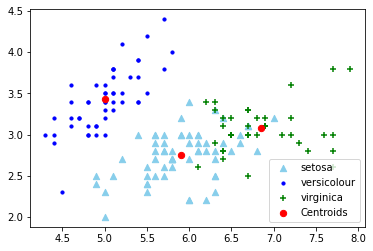

In [40]:
# Visualising the clusters - On the first two columns
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 40, c = 'skyblue', label = 'setosa', marker='^')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 40, c = 'blue', label = 'versicolour', marker='.')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 40, c = 'green', label = 'virginica', marker='+')

# Plotting the centroids of the clusters
plt.scatter(KM.cluster_centers_[:, 0], KM.cluster_centers_[:,1], s = 40, c = 'red', label = 'Centroids', marker='o')

plt.legend()

**COMMENT:** *We have succesfully created clusters using K-Means algo*

The clusters are very closely placed and are mostly infiltrating each other's space, therefore we may conclude that there are alot of uncertainty and the overall clustering is not definite or good in terms of boundaries.